In [1]:
'''
tp = TextProcessor
# is, ASAP !!!!
df = tp.apply_contractions(df, col)
# is, AS SOON AS POSSIBLE !!!!
df = tp.remove_nonAlphanumeric(df, col)
# is  AS SOON AS POSSIBLE
df = tp.to_lower(df, col)
# is  as soon as possible
df = tp.apply_lemmatization(df, col)
# be  as soon as possible
df = tp.remove_stopwords(df, col)
#        soon    possible
df = tp.remove_extra_spaces(df, col)
# soon possible
# '''

# features + tfidf(ngram=(1,2)) + rating + tense + scaled(length) + absolute_sentiment

'\ntp = TextProcessor\n# is, ASAP !!!!\ndf = tp.apply_contractions(df, col)\n# is, AS SOON AS POSSIBLE !!!!\ndf = tp.remove_nonAlphanumeric(df, col)\n# is  AS SOON AS POSSIBLE\ndf = tp.to_lower(df, col)\n# is  as soon as possible\ndf = tp.apply_lemmatization(df, col)\n# be  as soon as possible\ndf = tp.remove_stopwords(df, col)\n#        soon    possible\ndf = tp.remove_extra_spaces(df, col)\n# soon possible\n# '

In [2]:
from utils import DataLoader, Metrics 
from classifiers import RandomForest, DecisionTree, LSVM, AdaBoost, XGBoost

In [3]:
data = DataLoader()
X_train, X_test, y_train, y_test = data.datasets

In [4]:
X_train[0].shape

(285,)

========================= DecisionTree =========================
Elapsed Time: 33.4769 seconds
DecisionTreeClassifier(criterion='entropy', max_depth=16)
Train Accuracy: 0.9048, F1: [0.901  0.8819 0.9048 0.9246]
Test  Accuracy: 0.5803, F1: [0.6    0.4658 0.5714 0.6465]


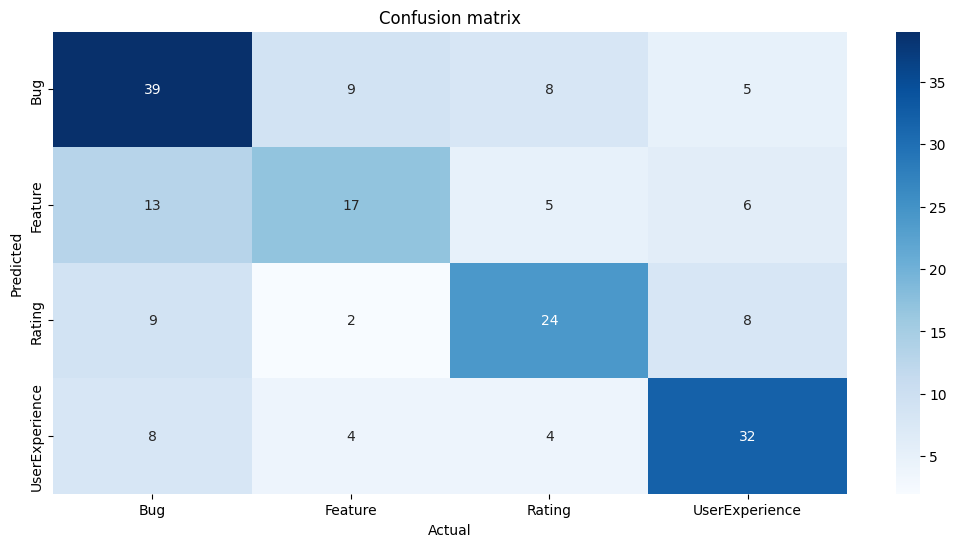

========================= LSVM =========================
Elapsed Time: 15.9083 seconds
LinearSVC(C=0.1, dual=False)
Train Accuracy: 0.75, F1: [0.7732 0.6048 0.7631 0.8025]
Test  Accuracy: 0.6218, F1: [0.7742 0.4308 0.5306 0.6465]


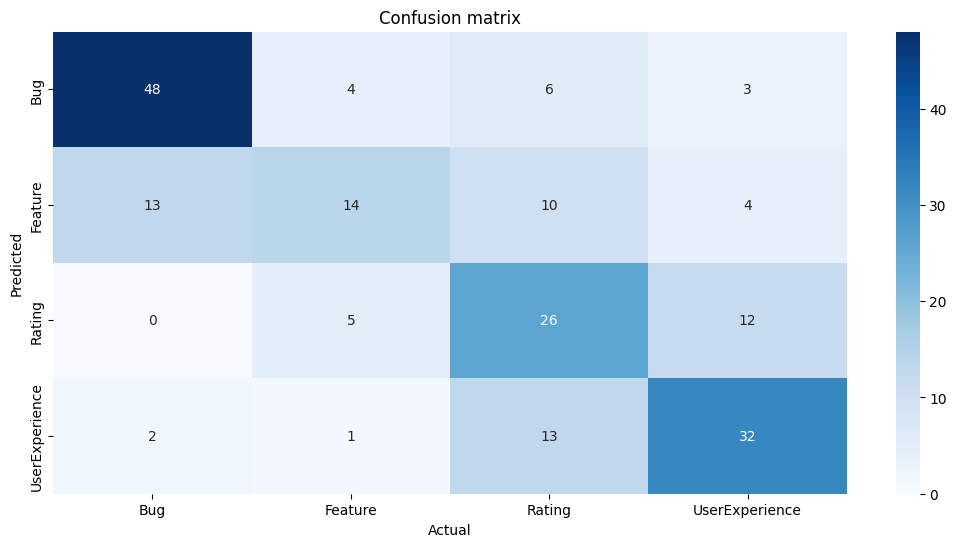

========================= RandomForest =========================
Elapsed Time: 44.0126 seconds
RandomForestClassifier(max_depth=12, min_samples_split=9, n_estimators=200)
Train Accuracy: 0.8205, F1: [0.8663 0.8346 0.7667 0.8123]
Test  Accuracy: 0.5855, F1: [0.6763 0.4    0.5057 0.64  ]


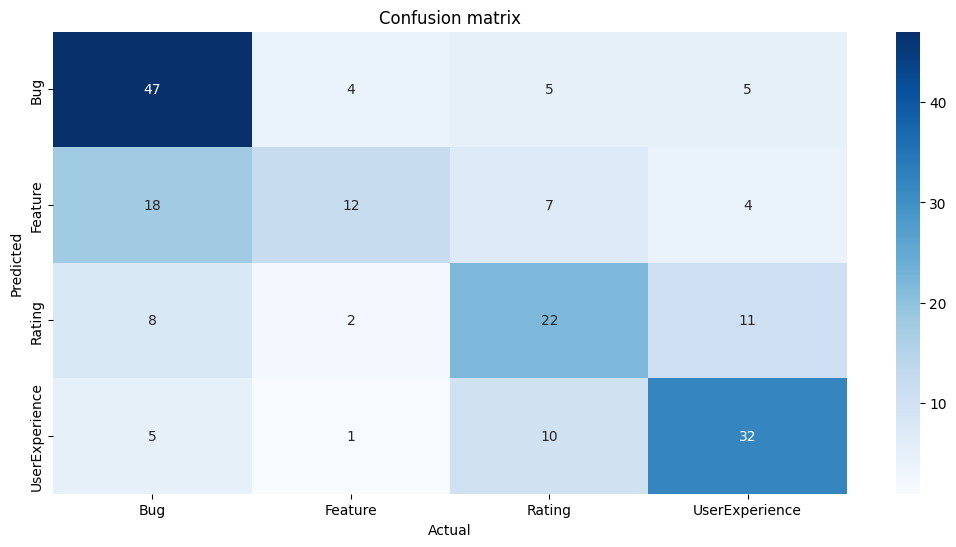

========================= AdaBoost =========================
Elapsed Time: 5.8441 seconds
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=10))
Train Accuracy: 0.9982, F1: [0.9983 1.     0.9983 0.9964]
Test  Accuracy: 0.5751, F1: [0.6723 0.4557 0.5227 0.6   ]


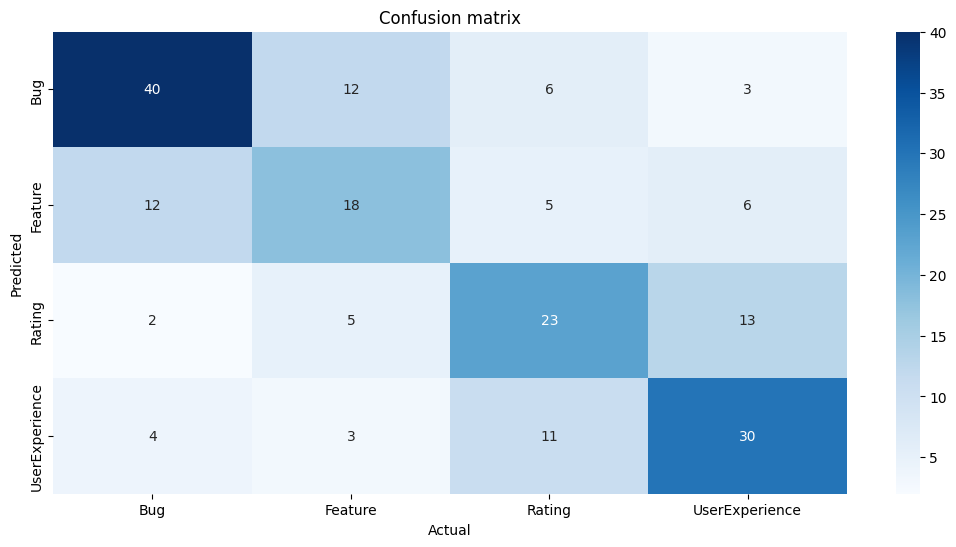

========================= XGBoost =========================
Elapsed Time: 72.8932 seconds
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8511475674418993, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.41578698683890736, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2662862606054766, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=2, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=145, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)
Train Accuracy: 0.891, F1: [0.914  0.8804 0.875  0.8916]
Test  Accuracy: 0.6736, F1: [0.7581 0.5526 0.6292 0.701 ]


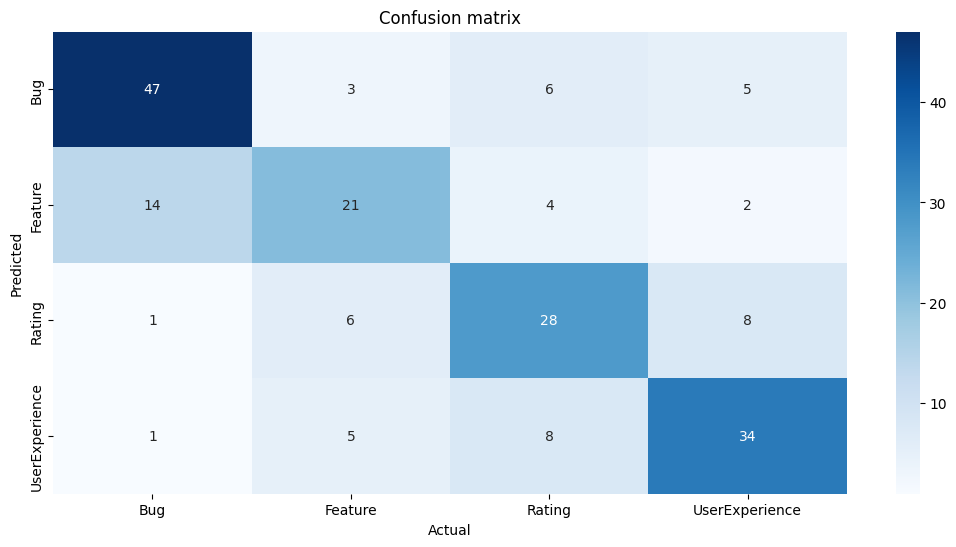

In [5]:
clfs = [DecisionTree, LSVM, RandomForest, AdaBoost, XGBoost]

for clf in clfs:
    print(f"========================= {clf.__name__} =========================")
    model = clf()
    model.model_selection(X_train, y_train)
    print(model.clf)

    Metrics.report(model, X_train, X_test, y_train, y_test)
    pred = model.predict(X_test)
    Metrics.plot_confusion_matrix(y_test, pred, data.labels)